# Making a contour map of global temperature


First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file using xarray.
We are opening a file that contains the global average temperature for each month. 
First, you need to download the file from Canvas/Files/data/T_CRU_1961_1990mean.nc
#### Only for those who are using Python on your own computer:   
You need to specify where the file is located. Also, change the cell type to "code".

#### If you are using JupyterHub:
Upload 'T_CRU_1961_1990mean.nc' file using the upload file tool on the left top (the one with an arrow facing up).

In [ ]:
filename='T_CRU_1961_1990mean.nc'
with xr.open_dataset(filename) as ds:      
    print(ds) 

Let's save temperature, lat, and lon from the dataset (ds) as ta, lat, and lon.

In [17]:
ta=ds.tem
lat=ds.lat
lon=ds.lon

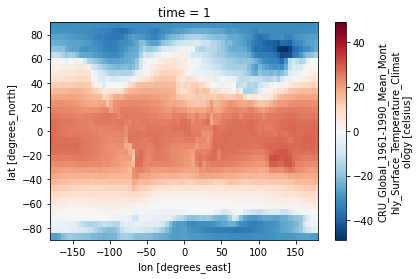

In [20]:
# make a plot for January
ta.isel(time=0).plot()

### Exercise
Make a plot for July.

### Adding a map

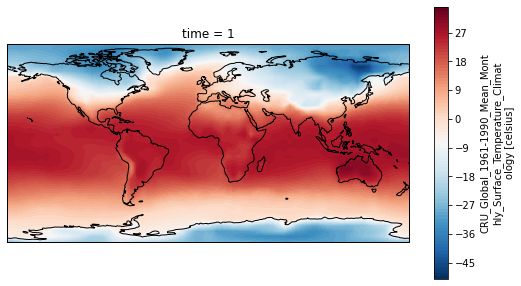

In [19]:
lev1=np.arange(-50,36,1)
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ta.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1)
ax.coastlines()

### Exercise
Add a map for the July temperature plot.

### Calculating Annual average.
Let's calculate annual average temperature and save it as ta_ann.

In [31]:
# Let's first check the time coordinate.
ds.time

<xarray.DataArray 'time' (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int16)
Coordinates:
  * time     (time) int16 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:    months

In [27]:
# Time is an integer array with 12 values, so we could just average them.
ta_ann = ta.mean(dim='time')

Let's make a plot for the annual mean temperature. 
ta_ann is a 2D variable, so we can make a contour plot.

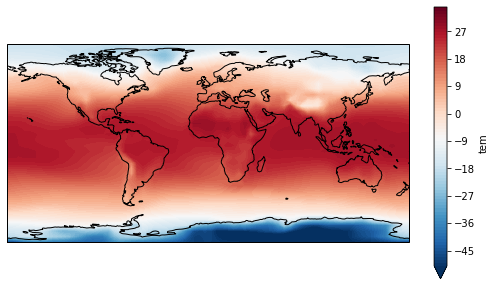

In [29]:
lev1=np.arange(-50,36,1)
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ta_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1)
ax.coastlines()

### Exercises
Let's make a contour plot with a map with precipitation.
First, you need to download the file from Canvas/Files/data/trmm_mon_1998_2015.nc   
Next, upload the file, read it as ds2, and print ds2.

Let's save precipitation, lat, and lon from the dataset (ds2) as pr, lat, and lon.

Make a contour plot with a map for January precipitation.

Make a contour plot with a map for July precipitation.

Check the time coordinate.

Average along the time axis and save the output as pr_ann.

Make a contour plot with a map for annual precipitation.